# Data Overview

In [1]:
# --- Standard Imports
import os
from pathlib import Path
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# directory with raw CSV files
data_dir = Path("../data/raw")

# list all CSV files
csv_files = list(data_dir.glob("*.csv"))
print(f"Found CSV files: {[f.name for f in csv_files]}")


Found CSV files: ['DM_AIAI_CustomerDB.csv', 'DM_AIAI_Metadata.csv', 'DM_AIAI_FlightsDB.csv']


In [3]:
# specify the files we want to load

customers_file = data_dir / "DM_AIAI_CustomerDB.csv"
flights_file   = data_dir / "DM_AIAI_FlightsDB.csv"

# load them with pandas
customers = pd.read_csv(customers_file)
flights   = pd.read_csv(flights_file)

print("Customers shape:", customers.shape)
print("Flights shape:", flights.shape)

Customers shape: (16921, 21)
Flights shape: (608436, 10)


In [4]:
# display the first few rows of each dataframe
display(customers.head(3))
display(flights.head(3))

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0


In [5]:
# Remove column "Unnamed: 0" from customers dataframe, because it can not be used as an index column, is not needed and has no context in the data
if "Unnamed: 0" in customers.columns:
	customers.drop(columns=["Unnamed: 0"], inplace=True)

display(customers.head(3))


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard


In [6]:
# Basic info

print("CustomerDB basic info:")
print(customers.info())

CustomerDB basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14 

In [7]:
# Display basic info
print("\nFlightsDB basic info:")
print(flights.info())


FlightsDB basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB
None


In [8]:
# Basic Descriptive Statistics
customers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Deon,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Cecilia Householder,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,16921,75,V6E 3D9,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Basic Descriptive Statistics
flights.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0


# Checking and Cleaning of Missing Values

In [10]:
# Check for missing values
print("Missing values in CustomerDB:")
display(customers.isna().sum())

print("\nMissing values in FlightsDB:")
display(flights.isna().sum())


Missing values in CustomerDB:


Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64


Missing values in FlightsDB:


Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [11]:
missing_ratio = customers.isna().mean().sort_values(ascending=False)
print((missing_ratio * 100).round(2))

CancellationDate           86.35
Customer Lifetime Value     0.12
Income                      0.12
Loyalty#                    0.00
First Name                  0.00
EnrollmentDateOpening       0.00
LoyaltyStatus               0.00
Marital Status              0.00
Location Code               0.00
Education                   0.00
Gender                      0.00
Postal code                 0.00
Longitude                   0.00
Latitude                    0.00
City                        0.00
Province or State           0.00
Country                     0.00
Customer Name               0.00
Last Name                   0.00
EnrollmentType              0.00
dtype: float64


First we look at the NaN values int the customers dataset, because there are no NaN values in the flights dataset.
We start with the column Income and then look at the Customer Lifetime Value column.

In [12]:
# rows where Income is missing
missing_income = customers[customers["Income"].isna()]
print("Rows with missing Income:", missing_income.shape[0])
display(missing_income.head(20))

Rows with missing Income: 20


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,B4W 4M6,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


In [13]:
# rows where Customer Lifetime Value is missing
missing_clv = customers[customers["Customer Lifetime Value"].isna()]
print("Rows with missing Customer Lifetime Value:", missing_clv.shape[0])
display(missing_clv.head(20))

Rows with missing Customer Lifetime Value: 20


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,B4W 4M6,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


It is odd, that People with CLV NaN and Income NaN are the same. Nevertheless, we will delete both because the number of missing values is very low compared to the total number of rows and these columns are important for our analysis. This should not significantly impact our analysis.

- Future Task: Instead of deleting them we should try to use the kNN algorithm to fill in the missing values.

In [14]:
# drop rows with missing Income OR Customer Lifetime Value
customers_clean = customers.dropna(subset=["Income", "Customer Lifetime Value"])

print("Original shape:", customers.shape)
print("After dropping:", customers_clean.shape)

# quick check that there are no more NaNs in these columns
print(customers_clean[["Income", "Customer Lifetime Value"]].isna().sum())


Original shape: (16921, 20)
After dropping: (16901, 20)
Income                     0
Customer Lifetime Value    0
dtype: int64


In [15]:
# Make customers_clean as customers for simplicity
customers = customers_clean
customers.shape

(16901, 20)

Now we look at the Column CancellationDate in the customers dataset. This column has many NaN values, but this is not a problem because it simply means that the customer has not cancelled their subscription.

In [16]:
# select first 3 rows where CancellationDate is NaN
active_customers = customers[customers["CancellationDate"].isna()].head(3)
display(active_customers)


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard


In [17]:
# select first 3 rows where CancellationDate not NaN
inactive_customers = customers[customers["CancellationDate"].notna()].head(3)
display(inactive_customers)

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
19,354730,Herbert,Cantabrana,Herbert Cantabrana,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,female,College,Urban,0.0,Married,Star,10/23/2017,1/2/2021,3885.46,Standard
31,201574,Trudy,Roscoe,Trudy Roscoe,Canada,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,female,Bachelor,Suburban,26605.0,Married,Star,4/6/2018,12/6/2018,3893.31,Standard


In [18]:
# We keep the NaN values in CancellationDate as they indicate active customers
# Users without a CancellationDate are considered active customers
# Users with a CancellationDate are considered inactive customers
# New Binary feature "IsActive" based on CancellationDate for customerDB
customers["IsActive"] = customers["CancellationDate"].isna().astype(int)


In [19]:
# percentage distribution
customers["IsActive"].value_counts(normalize=True).round(3) * 100

IsActive
1    86.5
0    13.5
Name: proportion, dtype: float64

# Validity Check of Data

Look at the categorical columns for unexpected values. We start with the customers dataset.

In [20]:
# List all categorical columns in customers
cat_columns = customers.select_dtypes(include=['object']).columns.tolist()
cat_columns

['First Name',
 'Last Name',
 'Customer Name',
 'Country',
 'Province or State',
 'City',
 'Postal code',
 'Gender',
 'Education',
 'Location Code',
 'Marital Status',
 'LoyaltyStatus',
 'EnrollmentDateOpening',
 'CancellationDate',
 'EnrollmentType']

In [21]:
# Check for numbers in FirstName, LastName, Customer Name, Country, Province or State, City, Gender, Education, Marital Status, LoyaltyStatus
import re

expected_cols = [
    "First Name", "Last Name", "Customer Name", "Country",
    "Province or State", "City", "Gender", "Education",
    "Marital Status", "LoyaltyStatus"
]

for col in expected_cols:
    if col in customers.columns:
        # find rows with digits in the column
        invalid_rows = customers[customers[col].str.contains(r'\d', na=False)]
        if not invalid_rows.empty:
            print(f"Column '{col}' has {invalid_rows.shape[0]} rows with unexpected numeric values.")
            display(invalid_rows[[col]].head(5))
        else:
            print(f"Column '{col}' has no unexpected numeric values.")
    else:
        print(f"Column '{col}' not found in customers dataframe.")


Column 'First Name' has no unexpected numeric values.
Column 'Last Name' has no unexpected numeric values.
Column 'Customer Name' has no unexpected numeric values.
Column 'Country' has no unexpected numeric values.
Column 'Province or State' has no unexpected numeric values.
Column 'City' has no unexpected numeric values.
Column 'Gender' has no unexpected numeric values.
Column 'Education' has no unexpected numeric values.
Column 'Marital Status' has no unexpected numeric values.
Column 'LoyaltyStatus' has no unexpected numeric values.


In [22]:
# Check for postal codes
print("Unique postal codes:", customers["Postal code"].nunique())
print(customers["Postal code"].value_counts().head(10))

#Check if Postal code has entries with more or less than 7 characters
long_postal_codes = customers[customers["Postal code"].astype(str).str.len() > 7]
print("Postal codes with more than 7 characters:", long_postal_codes.shape[0])
short_postal_codes = customers[customers["Postal code"].astype(str).str.len() < 7]
print("Postal codes with less than 7 characters:", short_postal_codes.shape[0])


Unique postal codes: 55
Postal code
V6E 3D9    917
V5R 1W3    699
V6T 1Y8    586
M2M 7K8    538
V6E 3Z3    538
P1J 8T7    508
H2T 9K8    503
K8V 4B2    490
G1B 3L5    481
H2T 2J6    449
Name: count, dtype: int64
Postal codes with more than 7 characters: 0
Postal codes with less than 7 characters: 0


In [23]:
# Check the categorical columns for unexpected values
for col in ["Gender", "Education", "Marital Status","LoyaltyStatus"]:
    if col in customers.columns:
        print(f"\n{col} categories:")
        print(customers[col].value_counts(dropna=False))


Gender categories:
Gender
female    8486
male      8415
Name: count, dtype: int64

Education categories:
Education
Bachelor                10578
College                  4273
High School or Below      792
Doctor                    742
Master                    516
Name: count, dtype: int64

Marital Status categories:
Marital Status
Married     9830
Single      4531
Divorced    2540
Name: count, dtype: int64

LoyaltyStatus categories:
LoyaltyStatus
Star      7741
Nova      5722
Aurora    3438
Name: count, dtype: int64


Look at the minimum and maximum values of numeric columns to identify potential outliers.
We start with the customers dataset.

In [24]:
# Min and Max Values of each column of customers db
numeric_cols = customers.select_dtypes(include=["number"]).columns

min_max = customers[numeric_cols].agg(["min", "max"]).T
min_max.transpose()


,Loyalty#,Latitude,Longitude,Income,Customer Lifetime Value,IsActive
min,100018.0,42.984924,-135.056840,0.0,1898.01,0.0
max,999986.0,60.721188,-52.712578,99981.0,83325.38,1.0


- Loyalty Members: 0 and 1 make sense
- Lattitude and Longitude make sense because it is only data from Canada (Longitutde: -52 to -141, Latitude: 41 to 83)
- Income between 0 and 99981 has to be checked if it makes sense
- Customer Lifetime Value has to be checked
- IsActive makes sense because it is only 0 and 1

In [25]:
zero_income = customers[customers["Income"] == 0]
print("Number of customers with Income = 0:", zero_income.shape[0])

Number of customers with Income = 0: 4273


In [26]:
# Show a few rows of zero_income
zero_income.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,...,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard,1
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,...,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard,0
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,...,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard,1
6,927943,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,P5S 6R4,...,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard,1
13,988178,Andre,Cotugno,Andre Cotugno,Canada,Quebec,Montreal,45.501690,-73.567253,H4G 3T4,...,College,Rural,0.0,Single,Star,10/13/2016,NaN,3871.07,Standard,1


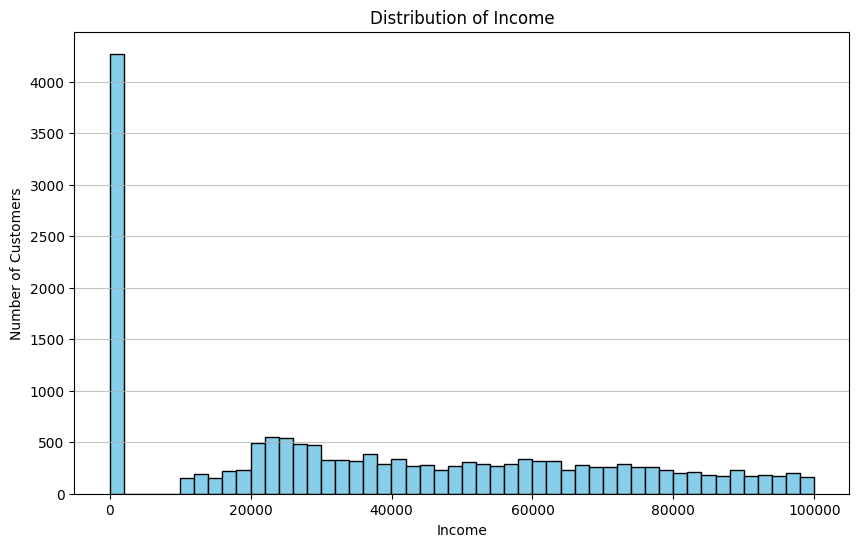

In [27]:
# Plot histogram of Income
plt.figure(figsize=(10, 6))
plt.hist(customers['Income'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [28]:
# Zero income group characteristics
zero_income.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,4273.0,NaN,NaN,NaN,549938.074889,255481.607337,100102.0,331184.0,548244.0,765446.0,999982.0
First Name,4273,2843,Andrew,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,4273,4165,Kesson,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,4273,4273,Dayle Menez,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,4273,1,Canada,4273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,4273,11,Ontario,1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,4273,29,Toronto,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,4273.0,NaN,NaN,NaN,47.180149,3.291495,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,4273.0,NaN,NaN,NaN,-92.199616,22.263138,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,4273,55,V6E 3D9,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


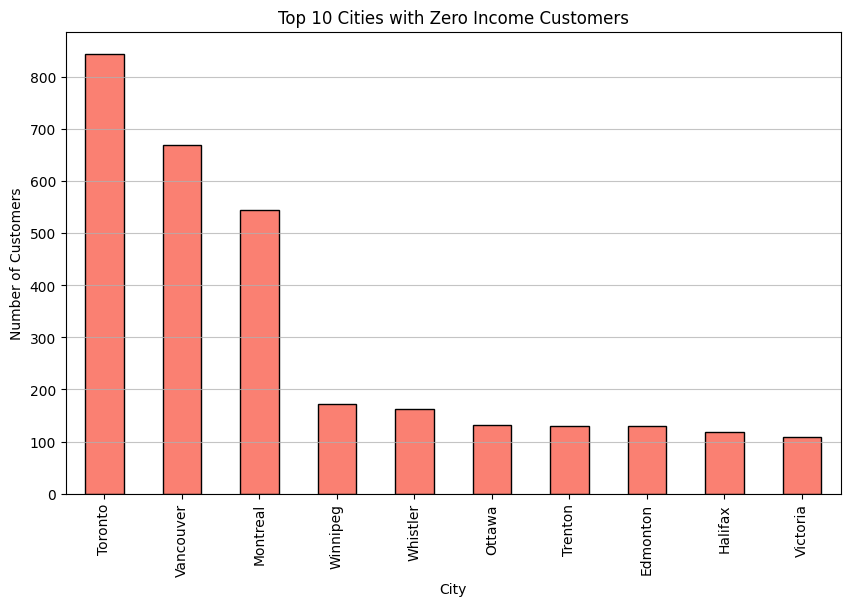

In [29]:
# Visualize the top 10 cities of zero income group
top_cities = zero_income['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Cities with Zero Income Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

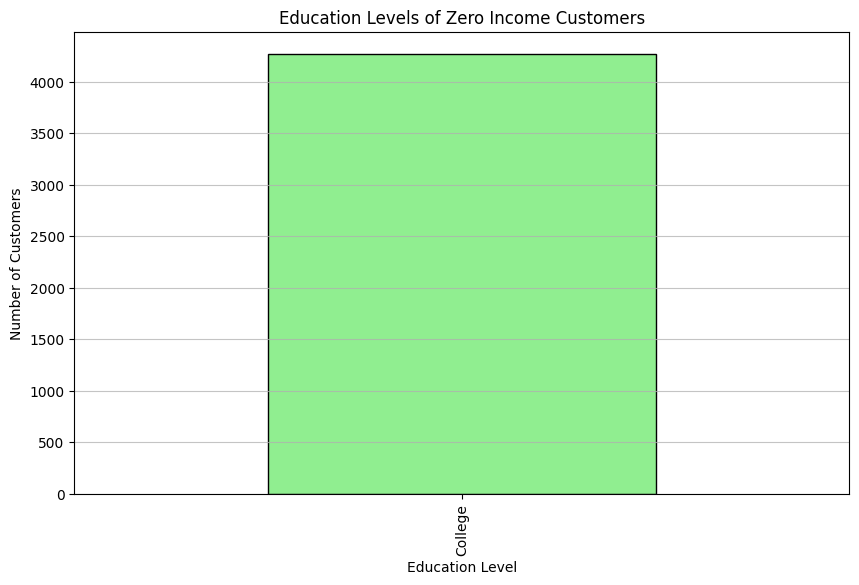

In [30]:
# Visualize education levels of zero income group
education_counts = zero_income['Education'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Education Levels of Zero Income Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

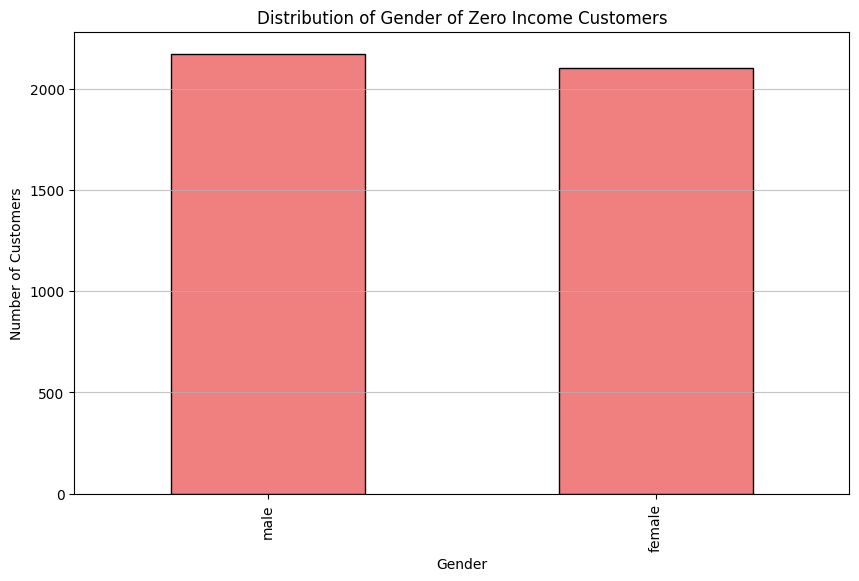

In [31]:
# Visualize distribution of gender of zero income group
gender_counts = zero_income['Gender'].value_counts()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Gender of Zero Income Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

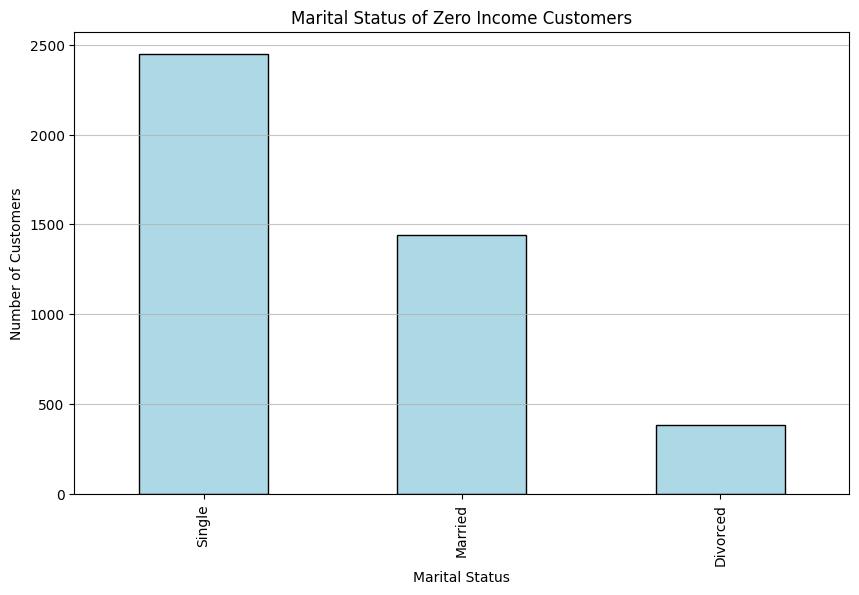

In [32]:
# Visualize the marital status of zero income group
marital_status_counts = zero_income['Marital Status'].value_counts()
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Marital Status of Zero Income Customers')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

I wanted to find out, why there are so many customers with 0 income. It seems that these are mainly unemployed people with highschool degree. Most of them are single. This data seems to be valid and reasonable.

- Looking at the Income distribution, it seems that there are some outliers with very high income. We will remove all customers with an income above 100000, because this is not a realistic income for most people in Canada.

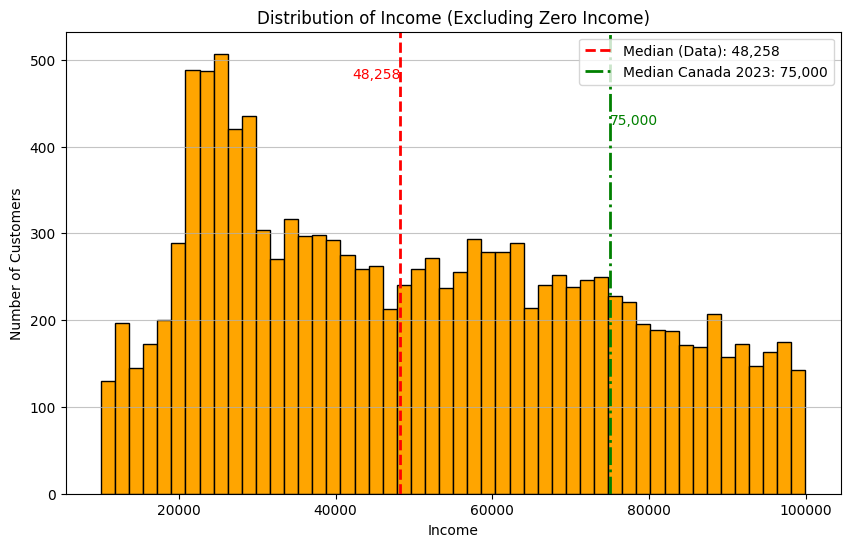

In [33]:
# Calculate median income (only > 0)
median_income = customers[customers['Income'] > 0]['Income'].median()

# Histogram as before
plt.figure(figsize=(10, 6))
plt.hist(customers[customers['Income'] > 0]['Income'], bins=50, color='orange', edgecolor='black')

# Add median line (data)
plt.axvline(median_income, color='red', linestyle='--', linewidth=2, label=f"Median (Data): {median_income:,.0f}")

# Add median line for Canada 2023 (fixed value 75,000)
median_canada_2023 = 75000
plt.axvline(median_canada_2023, color='green', linestyle='-.', linewidth=2, label='Median Canada 2023: 75,000')

# Optional: annotate values as text
ylim = plt.gca().get_ylim()
plt.text(median_income, ylim[1]*0.9, f"{median_income:,.0f}", color='red', ha='right')
plt.text(median_canada_2023, ylim[1]*0.8, '75,000', color='green', ha='left')

plt.title('Distribution of Income (Excluding Zero Income)')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

- The Median income of the customers is lower than the median income of the canadian population.

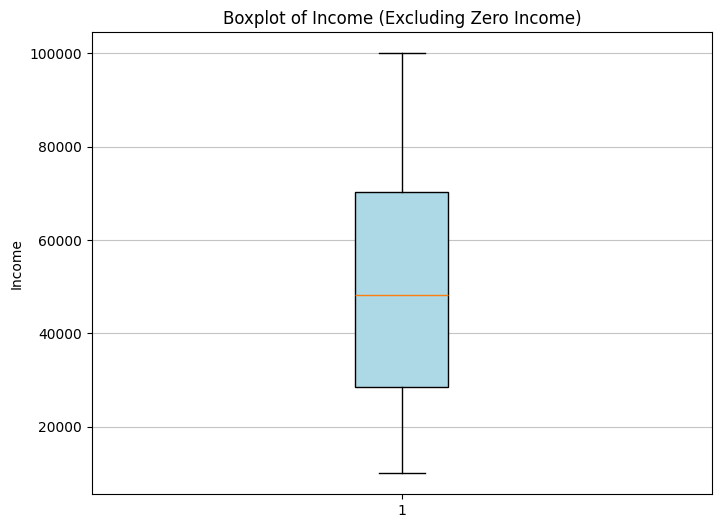

In [34]:
# Boxplot of Income (Excluding Zero Income)
plt.figure(figsize=(8, 6))
plt.boxplot(customers[customers['Income'] > 0]['Income'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Income (Excluding Zero Income)')
plt.ylabel('Income')
plt.grid(axis='y', alpha=0.75)
plt.show()

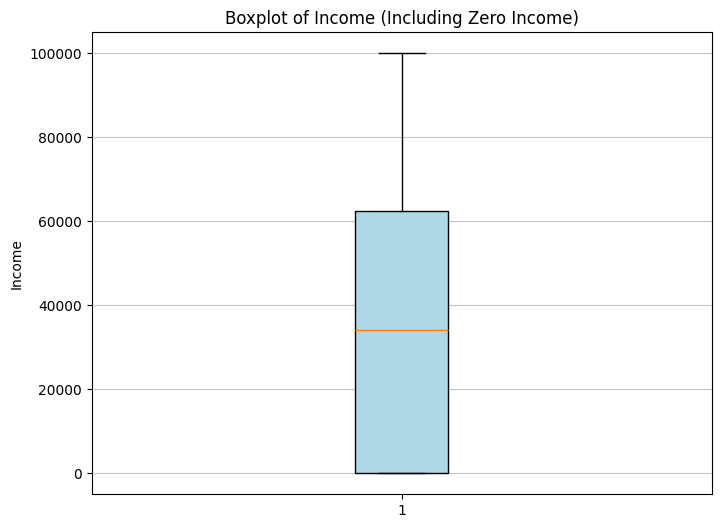

In [35]:
#Boxplot of Income (Including Zero Income)
plt.figure(figsize=(8, 6))
plt.boxplot(customers['Income'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Income (Including Zero Income)')
plt.ylabel('Income')
plt.grid(axis='y', alpha=0.75)
plt.show()

The Income column is valid even though there are many zero values and really high values. The median of the income is lower than the median of canadian population, but this is reasonable because the dataset doesnt have to represent the whole population. Maybe the strategy of the airline is different or there are other reasons. But the data seems to be valid and it is the task to find out more about the customers and interpret the data.

- the next thing is to check the Customer Lifetime Value column to be valid or not 

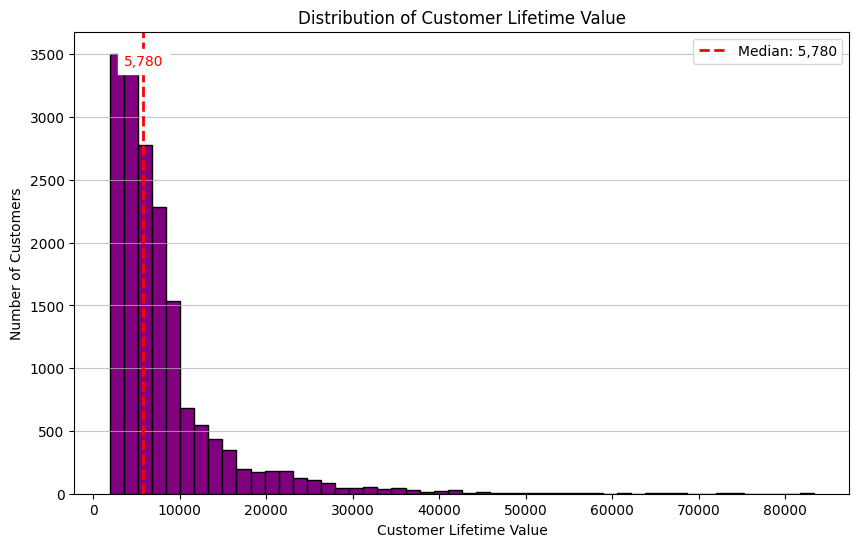

In [36]:
median_clv = customers['Customer Lifetime Value'].median()

# Customer Lifetime Value Distribution
plt.figure(figsize=(10, 6))
plt.hist(customers['Customer Lifetime Value'], bins=50, color='purple', edgecolor='black')
plt.axvline(median_clv, color='red', linestyle='--', linewidth=2, label=f"Median: {median_clv:,.0f}")
# Beschriftung der Median-Linie oben im Plot
ylim = plt.gca().get_ylim()
plt.text(median_clv, ylim[1]*0.92, f"{median_clv:,.0f}", color='red', ha='center', va='bottom', fontsize=10, backgroundcolor='white')

plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

we can see a skewed distribution to the right with a long tail. There are some customers with very high CLV, which could be outliers or VIP customers. The median CLV is much lower than the mean, indicating that most customers have a relatively low CLV, while a few have very high values. This distribution seems reasonable for a customer base, where a small number of customers contribute significantly to the overall value.

These findings suggest that the Customer Lifetime Value data is valid and reflects typical customer behavior in many industries.

Next thing is to check the flights dataset.

In [37]:
# Min and Max Values of each column of flights db which are numeric
numeric_cols = flights.select_dtypes(include=["number"]).columns

min_max = flights[numeric_cols].agg(["min", "max"]).T
min_max.transpose()


,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
min,100018.0,2019.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,999986.0,2021.0,12.0,21.0,11.0,42040.0,4204.0,7496.0,74.0


We can see that the flights are from 2019 to 2021. There are some columns with values 0. The columns NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated and PointsRedeemed are calculated per Month, so there are some months where the customer did not fly. This is valid data.

### Next step is to check for duplicates in both datasets.

- first we check the loyalty id. 
- It should be unique in both datasets to identify a customer.

In [38]:
# Check uniqueness of Loyalty in customers
n_rows = customers.shape[0]
n_unique_ids = customers["Loyalty#"].nunique()

print("Rows in CustomerDB:", n_rows)
print("Unique Loyalty IDs:", n_unique_ids)

if n_rows == n_unique_ids:
    print("Loyalty is unique per row.")
else:
    print("Some Loyalty values are duplicated!")
    print ("There are", n_rows - n_unique_ids - 1, "duplicated Loyalty values.")


Rows in CustomerDB: 16901
Unique Loyalty IDs: 16737
Some Loyalty values are duplicated!
There are 163 duplicated Loyalty values.


- There are some duplicated Loyalty values in the customers dataset. We have to check if these are really duplicates or if there are different customers with the same loyalty id. If they are duplicates, we have to delete them.

In [39]:
name_counts = (
    customers.groupby(["First Name", "Last Name"])["Loyalty#"]
    .nunique()
    .reset_index(name="n_ids")
)

# names linked to more than one Loyalty
duplicates_by_name = name_counts[name_counts["n_ids"] > 1]

print("Customers with the same name but different Loyalty IDs:", duplicates_by_name.shape[0])
display(duplicates_by_name.head(20))


Customers with the same name but different Loyalty IDs: 0


,First Name,Last Name,n_ids


- That means that different customers have the same loyalty id. This is a problem because we cannot identify the customers uniquely. We have to check how many different customers have the same loyalty id.

In [40]:
# Check uniqueness of First Name and Last Name per Loyalty ID
# Count unique first and last names per Loyalty ID
id_name_counts = (
    customers.groupby("Loyalty#")[["First Name", "Last Name"]]
    .nunique()
    .reset_index()
)

# Loyalty IDs linked to more than one unique first or last name
inconsistent_ids = id_name_counts[
    (id_name_counts["First Name"] > 1) | (id_name_counts["Last Name"] > 1)
]

print("Loyalty values linked to multiple different names:", inconsistent_ids.shape[0])
display(inconsistent_ids.head(3))


Loyalty values linked to multiple different names: 163


,Loyalty#,First Name,Last Name
41,101902,2,2
113,106001,2,2
122,106509,2,2


In [41]:
# show the entry of 101902
display(customers[customers["Loyalty#"] == 101902])

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive
1646,101902,Hans,Schlottmann,Hans Schlottmann,Canada,Ontario,London,42.984924,-81.245277,M5B 3E4,...,College,Rural,0.0,Married,Aurora,1/7/2020,NaN,6265.34,Standard,1
2668,101902,Yi,Nesti,Yi Nesti,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,...,Bachelor,Urban,79090.0,Married,Aurora,3/19/2020,NaN,8609.16,Standard,1


In [42]:
# Print some of the inconsistent IDs
print("Some inconsistent Loyalty IDs:")
display(customers[customers["Loyalty#"].isin(inconsistent_ids["Loyalty#"])].head(3))

Some inconsistent Loyalty IDs:


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,IsActive
5,193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,...,Bachelor,Rural,26262.0,Married,Star,5/7/2015,NaN,3844.57,Standard,1
123,746226,Theodora,Sampieri,Theodora Sampieri,Canada,British Columbia,Whistler,50.116322,-122.95736,V6T 1Y8,...,Bachelor,Urban,43177.0,Married,Star,1/17/2021,NaN,4089.04,Standard,1
141,279419,Reyes,Sobczak,Reyes Sobczak,Canada,British Columbia,West Vancouver,49.328625,-123.16019,V6V 8Z3,...,College,Urban,0.0,Single,Star,7/3/2016,NaN,4117.37,Standard,1


- We check the duplicated loyalty ids in the other database and see how many flights are linked to these loyalty ids.


In [43]:
# Check flights database for these inconsistent loyalty ids
flights_inconsistent = flights[flights["Loyalty#"].isin(inconsistent_ids["Loyalty#"])]
print("Number of flights linked to inconsistent Loyalty IDs:", flights_inconsistent.shape[0])
display(flights_inconsistent.head(3))

# Check if there are two entries for each month of the same loyalty id
duplicate_flights = (
    flights_inconsistent.groupby(["Loyalty#", "Year", "Month"])
    .size()
    .reset_index(name="count")
)


Number of flights linked to inconsistent Loyalty IDs: 11772


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
27,279419,2021,12,12/1/2021,12.0,0.0,11849.0,1184.0,0.0,0.0
171,990512,2021,12,12/1/2021,5.0,2.0,31991.0,3199.0,0.0,0.0
248,322169,2021,12,12/1/2021,2.0,0.0,17125.0,1712.0,0.0,0.0


In [44]:
# Print all data for 101902 in flights db for 2020 and sort by Month
display(flights[(flights["Loyalty#"] == 101902) & (flights["Year"] == 2020)].sort_values("Month"))

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
76110,101902,2020,1,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
85651,101902,2020,1,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
63781,101902,2020,2,2/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
71883,101902,2020,2,2/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
44928,101902,2020,3,3/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
54889,101902,2020,3,3/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
28036,101902,2020,4,4/1/2020,4.0,0.0,11203.0,1120.0,0.0,0.0
37143,101902,2020,4,4/1/2020,4.0,4.0,17465.0,1746.0,3929.0,39.0
5658,101902,2020,5,5/1/2020,9.0,3.0,18565.0,1856.0,0.0,0.0
13775,101902,2020,5,5/1/2020,7.0,0.0,26607.0,2660.0,0.0,0.0


- One Major problem of these duplicated loyalty ids is, that we cannot link the customers to their flights. There is no reasonable way to differentiate between the two customers with the same loyalty id. So that the even changing the loyalty id of one customer would not help, because we still do not know which flights belong to which customer. We would create a new customer with a new loyalty id, but this customer would have no flights linked to him. So we would loose all the information about the flights of these customers and the other customer would have all the flights linked to him. This would distort the data and make it unusable for analysis.
  
- So for this reason we have to delete all customers with duplicated loyalty ids and all their flights. This is the only way to ensure that the remaining data is valid and can be used for analysis.

- We may lose some important customers, but there is no other way to ensure the validity of the data. The number of affected customers is relatively low compared to the total number of customers, so the impact on the analysis should be minimal.

In [45]:
# Clean the customers db by removing all inconsistent loyalty ids
# get all Loyalty IDs that have inconsistent names
conflict_ids = inconsistent_ids["Loyalty#"]

# remove them from customers
customers_clean = customers[~customers["Loyalty#"].isin(conflict_ids)].copy()

print("Original customers:", customers.shape[0])
print("Clean customers:", customers_clean.shape[0])
print("Dropped conflicted customers:", customers.shape[0] - customers_clean.shape[0])


Original customers: 16901
Clean customers: 16574
Dropped conflicted customers: 327


In [46]:
# Clean the flights db by removing all entries with inconsistent loyalty ids
flights_clean = flights[~flights["Loyalty#"].isin(conflict_ids)].copy()
print("Original flights:", flights.shape[0])
print("Clean flights:", flights_clean.shape[0])
print("Dropped conflicted flights:", flights.shape[0] - flights_clean.shape[0])

Original flights: 608436
Clean flights: 596664
Dropped conflicted flights: 11772


In [47]:
# Check datatypes of flights
# Check the datatypes of flights db for unexpected values
flights_clean.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

- It is odd that NumFlights and NumFlightsWithCompanions are not integers, because you cannot have a fraction of a flight and the column adds up the number of flights per month. We will convert these columns to integers.

In [48]:
# Convert NumFlights and NumFlightsWithCompanions to integer type
flights_clean["NumFlights"] = flights_clean["NumFlights"].astype(int)
flights_clean["NumFlightsWithCompanions"] = flights_clean["NumFlightsWithCompanions"].astype(int)

# print the datatypes of flights
print("Flights dtypes:")
print(flights_clean.dtypes)

Flights dtypes:
Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                    int64
NumFlightsWithCompanions      int64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object


In [49]:
# Check flights_clean for DistanceKM and NumFlights. If NumFlights is 0, DistanceKM should also be 0 and vice versa.
# Check first how many entries have NumFlights = 0 but DistanceKM > 0
inconsistent_distance = flights_clean[(flights_clean["NumFlights"] == 0) & (flights_clean["DistanceKM"] > 0)]
print("Entries with NumFlights = 0 but DistanceKM > 0:", inconsistent_distance.shape[0])
display(inconsistent_distance.head(3))

# Check first how many entries have DistanceKM = 0 but NumFlights > 0
inconsistent_numflights = flights_clean[(flights_clean["DistanceKM"] == 0) & (flights_clean["NumFlights"] > 0)]
print("Entries with DistanceKM = 0 but NumFlights > 0:", inconsistent_numflights.shape[0])
display(inconsistent_numflights.head(3))

Entries with NumFlights = 0 but DistanceKM > 0: 11575


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
19,261109,2021,12,12/1/2021,0,0,13736.0,1373.0,0.0,0.0
93,817609,2021,12,12/1/2021,0,0,23775.0,2377.0,0.0,0.0
96,192600,2021,12,12/1/2021,0,0,5119.0,511.0,0.0,0.0


Entries with DistanceKM = 0 but NumFlights > 0: 0


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


- There is another Problem: The longest flight from Canada to international destinations is around 13000 km. (Vancouver to Singapore). So there cant be customers with 1 flight in the month and over 13.000 km distance. We will check customers with 1 flight and over 13.000 km distance, 2 flights and over 26.000 km distance and so on. We will set the NumFlights to NaN for these customers and then use a simple regression model to predict the number of flights based on the distance. This is not perfect, but it is better than having invalid data in the dataset.


In [50]:
# Maximum possible distance for a single flight (approx. Vancouver → Singapore)
max_km_per_flight = 13000  

# b) Threshold rule: flag rows where DistanceKM > NumFlights * 13,000
#    → i.e., total distance is unrealistically high given the number of flights
mask_threshold_bad = (
    flights_clean["NumFlights"].notna() &  # only consider rows with valid NumFlights
    (flights_clean["NumFlights"] > 0) &    # ignore entries with zero flights
    (flights_clean["DistanceKM"] > flights_clean["NumFlights"] * max_km_per_flight)
)

# Count and preview all entries exceeding 13,000 km per flight (suspiciously high)
print("Entries with DistanceKM > NumFlights * 13,000 km:", mask_threshold_bad.sum())

# Display first few suspicious rows for inspection
display(flights_clean[mask_threshold_bad].head(3))


Entries with DistanceKM > NumFlights * 13,000 km: 13314


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
41,377724,2021,12,12/1/2021,1,1,16998.0,1699.0,0.0,0.0
75,684835,2021,12,12/1/2021,1,1,22980.0,2298.0,4867.0,48.0
107,286551,2021,12,12/1/2021,2,0,27148.0,2714.0,0.0,0.0


- So we have 13.314 Entries which are invalid and need to be corrected like the 11.575 Entries with 0 flights and over 0 km distance. In Total we have 24.889 Entries which are invalid and need to be corrected. 

In [51]:
# display first 3 rows of flights_clean
display(flights_clean.head(3))

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2,2,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0,0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10,3,14745.0,1474.0,0.0,0.0


In [52]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# ---- Parameters ----
KM_PER_FLIGHT = 13_000   # threshold rule (~max plausible km per single flight)



# ---- Base DF for modeling ----
df_model = flights_clean.copy()

# ---- Training set (only valid cases) ----
mask_train = (df_model["NumFlights"] > 0) & (df_model["DistanceKM"] > 0)
train = df_model.loc[mask_train, ["DistanceKM", "NumFlights"]].copy()
train["AvgLegKM"] = train["DistanceKM"] / train["NumFlights"]

# Remove outliers (more robust): keep central 98% of AvgLegKM
p1, p99 = np.percentile(train["AvgLegKM"], [1, 99])
train = train[(train["AvgLegKM"] >= p1) & (train["AvgLegKM"] <= p99)]

# Features/target
# Feature: log(1 + total distance) to reduce skew; Target: average km per leg
X_train = np.log1p(train["DistanceKM"].to_numpy()).reshape(-1, 1)
y_train = train["AvgLegKM"].to_numpy()

# KNN to predict average leg length (distance-based weighting, Euclidean metric)
knn = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=15, weights="distance", p=2)
)
knn.fit(X_train, y_train)

# ---- Target set: only rows that should actually be corrected ----
mask_zero   = (df_model["NumFlights"] == 0) & (df_model["DistanceKM"] > 0)
mask_nan    = df_model["NumFlights"].isna() & (df_model["DistanceKM"] > 0)
mask_thresh = (
    df_model["NumFlights"].notna() &
    (df_model["NumFlights"] > 0) &
    (df_model["DistanceKM"] > df_model["NumFlights"] * KM_PER_FLIGHT)  # violates per-flight threshold
)
mask_pred = mask_zero | mask_nan | mask_thresh
pred_idx  = df_model.index[mask_pred]

print("Train cases:", mask_train.sum())
print("Targets to predict:", mask_pred.sum())

# ---- Prediction: AvgLegKM -> derive NumFlights ----
X_pred = np.log1p(df_model.loc[pred_idx, "DistanceKM"].to_numpy()).reshape(-1, 1)
avgleg_pred = knn.predict(X_pred)

# Clamp predicted AvgLegKM to reasonable bounds (avoid extreme leg sizes)
low, high = np.percentile(y_train, [5, 95])
avgleg_pred = np.clip(avgleg_pred, low, high)

# Flights = ceil(Distance / AvgLegKM); cap at 99th percentile of observed flights
y_hat = df_model.loc[pred_idx, "DistanceKM"].to_numpy() / avgleg_pred
y_hat_smooth = np.round(y_hat + np.random.uniform(-0.2, 0.2, size=len(y_hat)))
y_hat_smooth = np.clip(y_hat_smooth, 1, np.percentile(df_model.loc[mask_train, "NumFlights"], 99))
y_hat_int = y_hat_smooth.astype(int)


# ---- Write back into df_model ----
df_model.loc[pred_idx, "NumFlights"] = y_hat_int

# Make entire column integer-like + business guardrails
# - coerce -> round -> clip lower bound at 0 -> store as pandas nullable Int64
df_model["NumFlights"] = (
    pd.to_numeric(df_model["NumFlights"], errors="coerce")
      .round().clip(lower=0).astype("Int64")
)

# If distance > 0 but NumFlights == 0, enforce minimum of 1 flight
need_min1 = (df_model["DistanceKM"] > 0) & (df_model["NumFlights"] == 0)
df_model.loc[need_min1, "NumFlights"] = 1

# Sanity checks
print("Remaining inconsistencies in df_model:",
      ((df_model["NumFlights"] == 0) & (df_model["DistanceKM"] > 0)).sum())
print("Remaining threshold violations in df_model:",
      ((df_model["NumFlights"] > 0) &
       (df_model["DistanceKM"] > df_model["NumFlights"] * KM_PER_FLIGHT)).sum())
print("df_model NumFlights dtype:", df_model["NumFlights"].dtype)






Train cases: 293593
Targets to predict: 24889
Remaining inconsistencies in df_model: 0
Remaining threshold violations in df_model: 342
df_model NumFlights dtype: Int64


In [53]:
# --- Hard guard for remaining threshold violations ---
# Ensures that no entry has an average flight distance > KM_PER_FLIGHT (e.g., >13,000 km per leg)

viol = (
    (df_model["NumFlights"] > 0) &
    (df_model["DistanceKM"] > df_model["NumFlights"] * KM_PER_FLIGHT)
)

if viol.any():
    # Compute the minimum number of flights needed to stay below the threshold
    needed = np.ceil(df_model.loc[viol, "DistanceKM"] / KM_PER_FLIGHT).astype(int)
    df_model.loc[viol, "NumFlights"] = needed

    # Recast column to integer-like type and enforce basic guards again
    df_model["NumFlights"] = (
        pd.to_numeric(df_model["NumFlights"], errors="coerce")
          .round()
          .clip(lower=0)
          .astype("Int64")  # pandas nullable integer dtype
    )

    # Ensure no record with DistanceKM > 0 has NumFlights == 0
    need_min1 = (df_model["DistanceKM"] > 0) & (df_model["NumFlights"] == 0)
    df_model.loc[need_min1, "NumFlights"] = 1

# Final check
rem = (
    (df_model["NumFlights"] > 0) &
    (df_model["DistanceKM"] > df_model["NumFlights"] * KM_PER_FLIGHT)
).sum()

print("Remaining threshold violations after hard guard:", rem)


Remaining threshold violations after hard guard: 0


In [54]:
# ---- Write-back to flights_clean ----
# Commit the changes back to the original DataFrame.

# Build target mask explicitly with parentheses for readability and correct precedence.
mask_target_clean = (
    ((flights_clean["NumFlights"] == 0) & (flights_clean["DistanceKM"] > 0)) |
    (flights_clean["NumFlights"].isna() & (flights_clean["DistanceKM"] > 0)) |
    (
        (flights_clean["NumFlights"] > 0) &
        (flights_clean["DistanceKM"] > flights_clean["NumFlights"] * KM_PER_FLIGHT)
    )
)

idx_target_clean = flights_clean.index[mask_target_clean]

# Safety check: target sets in flights_clean and df_model should be identical.
# (Using index equality instead of just matching lengths is stricter and safer.)
assert idx_target_clean.equals(pred_idx), (
    f"Index mismatch: flights_clean targets={len(idx_target_clean)} "
    f"vs df_model targets={len(pred_idx)}"
)

# Write back predictions.
# TIP: assign with aligned indices (Series) to avoid order issues; don't convert to numpy.
flights_clean.loc[idx_target_clean, "NumFlights"] = df_model.loc[idx_target_clean, "NumFlights"]

# Cast NumFlights to integer-like + guardrails
flights_clean["NumFlights"] = (
    pd.to_numeric(flights_clean["NumFlights"], errors="coerce")
      .round()
      .clip(lower=0)
      .astype("Int64")   # pandas nullable integer dtype
)

# Business guard: if DistanceKM > 0 but NumFlights == 0, enforce minimum of 1 flight.
need_min1_fc = (flights_clean["DistanceKM"] > 0) & (flights_clean["NumFlights"] == 0)
flights_clean.loc[need_min1_fc, "NumFlights"] = 1

# Sanity checks
print(
    "Remaining inconsistencies in flights_clean:",
    ((flights_clean["NumFlights"] == 0) & (flights_clean["DistanceKM"] > 0)).sum()
)
print(
    "Remaining threshold violations in flights_clean:",
    (
        (flights_clean["NumFlights"] > 0) &
        (flights_clean["DistanceKM"] > flights_clean["NumFlights"] * KM_PER_FLIGHT)
    ).sum()
)
print("flights_clean NumFlights dtype:", flights_clean["NumFlights"].dtype)


Remaining inconsistencies in flights_clean: 0
Remaining threshold violations in flights_clean: 0
flights_clean NumFlights dtype: Int64


Statistics of predicted flight counts:
count    24889.000000
mean         4.878723
std          2.931855
min          0.803713
25%          2.763558
50%          3.955192
75%          6.309278
max         21.000000
dtype: float64


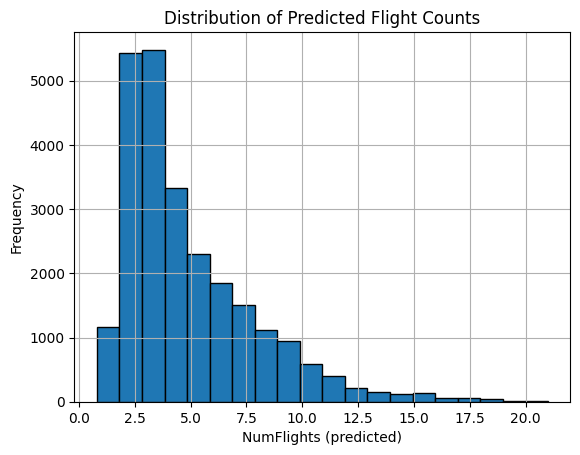

In [55]:
print("Statistics of predicted flight counts:")
print(pd.Series(y_hat).describe())

# ---- (Optional) Histogram ----
# Visualize the distribution of predicted number of flights
pd.Series(y_hat).hist(bins=20, edgecolor='black')
plt.xlabel("NumFlights (predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Flight Counts")
plt.show()


In [56]:
compare_df = flights_clean.loc[mask_pred, ["NumFlights", "DistanceKM"]].copy()
compare_df["NumFlights_pred"] = y_hat
compare_df["Diff"] = compare_df["NumFlights_pred"] - compare_df["NumFlights"].fillna(0)
display(compare_df.head(10))

,NumFlights,DistanceKM,NumFlights_pred,Diff
19,13,13736.0,13.114286,0.114286
41,3,16998.0,3.105882,0.105882
75,2,22980.0,2.195122,0.195122
93,5,23775.0,5.140187,0.140187
96,3,5119.0,2.906541,-0.093459
107,3,27148.0,2.926829,-0.073171
112,4,22839.0,4.111000,0.111
116,6,20681.0,6.436408,0.436408
126,3,18236.0,2.981651,-0.018349
154,5,17502.0,4.750236,-0.249764


In [57]:
# Make customers_clean as customers for simplicity
customers = customers_clean.copy()
customers.shape

(16574, 21)

In [58]:
# Replace flights with cleaned version
# Make flights_clean as flights for simplicity
flights = flights_clean.copy()
flights.shape

(596664, 10)

In [59]:
# Check: Inconsistent entries in flights (NumFlights=0 & DistanceKM>0)
inconsistent_flights = flights[(flights["NumFlights"] == 0) & (flights["DistanceKM"] > 0)]
print("Inconsistent in flights (after write-back):", inconsistent_flights.shape[0])
# display(inconsistent_flights.head(3))

Inconsistent in flights (after write-back): 0


In [60]:
# Check for missing values in both dataframes
print("Missing values in CustomerDB:")
display(customers.isna().sum())
print("\nMissing values in FlightsDB:")
display(flights.isna().sum())

Missing values in CustomerDB:


Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14327
Customer Lifetime Value        0
EnrollmentType                 0
IsActive                       0
dtype: int64


Missing values in FlightsDB:


Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [61]:
# define processed data directory
processed_dir = Path("../data/cleaned")
processed_dir.mkdir(parents=True, exist_ok=True)

# export cleaned customers
customers.to_csv(processed_dir / "customers_cleaned.csv", index=False)

# export cleaned flights
flights.to_csv(processed_dir / "flights_cleaned.csv", index=False)

print("Exported files:")
print(" -", processed_dir / "customers_cleaned.csv")
print(" -", processed_dir / "flights_cleaned.csv")


Exported files:
 - ../data/cleaned/customers_cleaned.csv
 - ../data/cleaned/flights_cleaned.csv
